# Tutorial on the Tight-Binding Method

This tutorial provides an exploration of predefined and custom tight-binding models implemented in QuantumDNA. Tight-binding models are widely used for studying electronic properties and dynamics in complex molecular systems, offering computational efficiency.

In this notebook, we demonstrate the versatility of qDNA by showcasing two distinct applications:

* **Time-Averaged Exciton Populations in a Fishbone Ladder Model (FLM)**
The FLM is a representative tight-binding model that mimics exciton dynamics in a DNA double helix including the sugar-phosphate backbone. This example illustrates how to compute time-averaged exciton populations, providing insight into energy transport and excitonic interactions.

* **Charge Transfer in the Fenna-Matthews-Olson (FMO) Complex**
The FMO complex, found in green sulfur bacteria, plays a crucial role in photosynthetic energy transfer. This example demonstrates how a custom TB model can be defined in QuantumDNA and can be used to simulate charge transfer in this well-studied complex, offering a glimpse into the quantum mechanical processes that underlie efficient energy transfer in biological systems.

This notebook equips you with the tools to perform simulations using TB models with QuantumDNA.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/1_TB_Models.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Save flag: Set to True to enable saving results (currently unused in this script)
save = False

# Verbose flag: Set to True to enable detailed logging
verbose = False

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Installation of QuantumDNA
# --------------------------

from importlib.util import find_spec

qDNA_installed = find_spec('qDNA') is not None

if not qDNA_installed:
    %pip install qDNA
    print("Successfully installed the 'qDNA' package.")
else:
    print("Package 'qDNA' is already installed.")

if verbose:
    %pip show qDNA  

from qDNA import *

# ------------------------
# Directory Setup
# ------------------------

import os
DATA_DIR_QDNA = DATA_DIR

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories to load data
DATA_DIR = os.path.join(ROOT_DIR, "data")
os.makedirs(DATA_DIR, exist_ok=True)

# Define directory to save figures
SAVE_DIR = os.path.join(DATA_DIR, "my_figures")
os.makedirs(SAVE_DIR, exist_ok=True)

# Define the directory to load figures
FIG_DIR = os.path.join(DATA_DIR_QDNA, "raw", "figures_tutorials")

if verbose:
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")

Package 'qDNA' is already installed.


## Average Exciton Probabilities in the Fishbone Ladder Model (FLM)

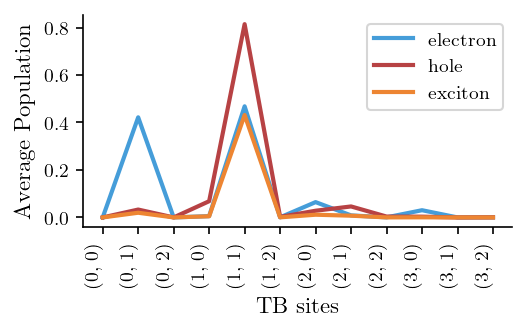

In [5]:
filename = '1BNA2'
filepath_pdb = os.path.join(DATA_DIR, "my_geometries", "RCSB", f"{filename}.pdb")

oligo = Oligomer(filepath_pdb, tb_model_name='FLM')
oligo.save_tb_params()

tb_sites = [['02B', '03B', '04B'], ['02G', '03C', '04G'], ['23C', '22G', '21C'], ['23B', '22B', '21B']]
tb_ham = TBHam(tb_sites, tb_model_name = 'FLM', source='1BNA2')

init_state = ('(1, 1)', '(1, 1)') # initial excitation in the middle of the upper strand
end_states = tb_ham.tb_basis

average_pop_e, average_pop_h, average_pop_ex = [], [], []
for end_state in end_states:
    average_pop = tb_ham.get_fourier(init_state, end_state, "average_pop")[2]
    average_pop_e.append(average_pop["electron"])
    average_pop_h.append(average_pop["hole"])
    average_pop_ex.append(average_pop["exciton"])

fig, ax = plt.subplots()

ax.plot(end_states, average_pop_e, label='electron')
ax.plot(end_states, average_pop_h, label='hole')
ax.plot(end_states, average_pop_ex, label='exciton')

ax.set_xticks(end_states)
ax.set_xticklabels(end_states, rotation=90, ha='right')

ax.set_ylabel("Average Population")
ax.set_xlabel("TB sites")
ax.legend()

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Customised tight-binding model for light harvesting in the FMO complex

Image taken from: Quantum Dynamics of Bath Influenced Excitonic Energy Transfer in Photosynthetic Pigment-Protein Complexes, J.W. Abbott, University of Bristol, 2020. DOI: 10.5281/zenodo.7229807.


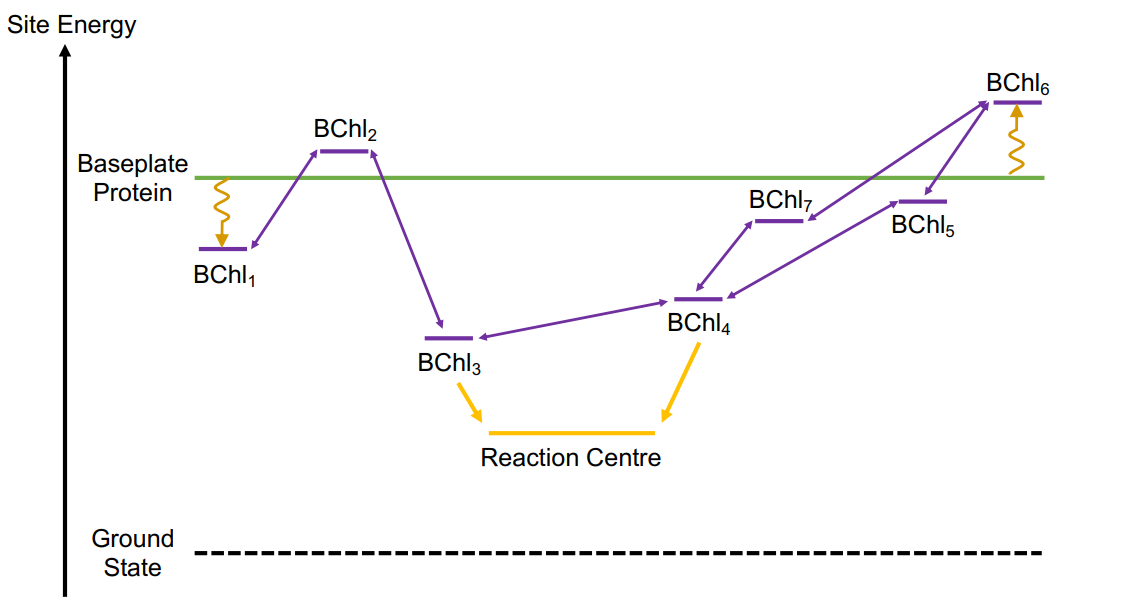

In [6]:
from IPython.display import Image

citation = "Quantum Dynamics of Bath Influenced Excitonic Energy Transfer in Photosynthetic Pigment-Protein Complexes, J.W. Abbott, University of Bristol, 2020. DOI: 10.5281/zenodo.7229807"
print(f"Image taken from: {citation}.")
Image(filename=os.path.join(FIG_DIR,'FMO_energy_level.png'), width=800)

In [7]:
tb_model_name = 'FMO_model'

tb_basis = get_tb_basis((1, 7))
tb_config = [('t', tb_basis[0], tb_basis[1]),
            ('t', tb_basis[1], tb_basis[2]),
            ('t', tb_basis[2], tb_basis[3]),
            ('t', tb_basis[3], tb_basis[4]),
            ('t', tb_basis[4], tb_basis[5]),
            ('t', tb_basis[5], tb_basis[6]),
            ('t', tb_basis[6], tb_basis[3]),
             ('E', tb_basis[0], tb_basis[0]),
             ('E', tb_basis[1], tb_basis[1]),
             ('E', tb_basis[2], tb_basis[2]),
             ('E', tb_basis[3], tb_basis[3]),
             ('E', tb_basis[4], tb_basis[4]),
             ('E', tb_basis[5], tb_basis[5]),
             ('E', tb_basis[6], tb_basis[6]),
            ]

tb_model = TBModel(7, tb_model_name=tb_model_name, num_channels=1, tb_config=tb_config)

Using custom TB model: FMO_model


In [8]:
from qDNA import save_json, load_json, get_conversion

filename = "FMO_params"
tb_params = {'t_BChl1_BChl2': -87.7, 't_BChl2_BChl1': -87.7, 't_BChl2_BChl3': 30.8, 't_BChl3_BChl2': 30.8, 't_BChl3_BChl4': -53.5,
            't_BChl4_BChl3': -53.5, 't_BChl4_BChl5': -70.7, 't_BChl5_BChl4': -70.7, 't_BChl5_BChl6': 81.1, 't_BChl6_BChl5': 81.1,
            't_BChl6_BChl7': 39.7, 't_BChl7_BChl6': 39.7, 't_BChl7_BChl4': -63.3, 't_BChl4_BChl7': -63.3,
            'E_BChl1': 12410, 'E_BChl2': 12530, 'E_BChl3': 12210, 'E_BChl4': 12320, 'E_BChl5': 12480, 'E_BChl6': 12630, 'E_BChl7': 12440}
# all parameters are given in 1/cm 
conversion = get_conversion('1/cm', 'rad/ps')
tb_params = {key: value*conversion for key, value in tb_params.items()}


save_json(tb_params, os.path.join(DATA_DIR, "my_tb_params", filename+'.json') )
tb_params = load_json(os.path.join(DATA_DIR, "my_tb_params", filename+'.json') )

In [9]:
tb_sites = ['BChl1', 'BChl2', 'BChl3', 'BChl4', 'BChl5', 'BChl6', 'BChl7']

tb_ham_matrix = tb_ham_1P(tb_model.tb_dims, tb_model.tb_config, tb_model.tb_basis, tb_params, dict(zip(tb_basis, tb_sites)) )
result = q.mesolve(q.Qobj(tb_ham_matrix), q.fock_dm(7,0), np.linspace(0,5,100), [], e_ops=[q.fock_dm(7,0), q.fock_dm(7,2)])

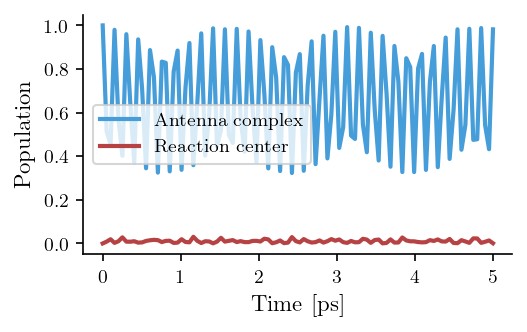

In [10]:
fig, ax = plt.subplots()

ax.plot(result.times, result.expect[0], label="Antenna complex")
ax.plot(result.times, result.expect[1], label="Reaction center")

ax.legend()
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Population")

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))